In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline

In [ ]:
# Increase the maximum number of columns displayed in Pandas to 200
pd.set_option('display.max_columns', 200)

# Set the default style of Matplotlib plots to "ggplot"
plt.style.use('ggplot')

In [ ]:

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/Base.csv")

In [ ]:
# Create a deep copy of the DataFrame
new_df = df.copy()

In [ ]:
# Get the number of rows and columns in the DataFrame
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 221098
Number of columns: 32


In [ ]:
# Display the first 5 rows of the DataFrame
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1.0,25.0,40.0,0.006735,102.453711,AA,1059.0,13096.035018,7850.955007,6742.080561,5.0,5.0,CB,163.0,1.0,BC,0.0,1.0,9.0,0.0,1500.0,0.0,INTERNET,16.224843,linux,1.0,1.0,0.0,0.0
1,0,0.8,0.617426,-1.0,89.0,20.0,0.010095,-0.849551,AD,1658.0,9223.283431,5745.251481,5941.664859,3.0,18.0,CA,154.0,1.0,BC,1.0,1.0,2.0,0.0,1500.0,0.0,INTERNET,3.363854,other,1.0,1.0,0.0,0.0
2,0,0.8,0.996707,9.0,14.0,40.0,0.012316,-1.490386,AB,1095.0,4471.472149,5471.988958,5992.555113,15.0,11.0,CA,89.0,1.0,BC,0.0,1.0,30.0,0.0,200.0,0.0,INTERNET,22.730559,windows,0.0,1.0,0.0,0.0
3,0,0.6,0.475100,11.0,14.0,30.0,0.006991,-1.863101,AB,3483.0,14431.993621,6755.344479,5970.336831,11.0,13.0,CA,90.0,1.0,BC,0.0,1.0,1.0,0.0,200.0,0.0,INTERNET,15.215816,linux,1.0,1.0,0.0,0.0
4,0,0.9,0.842307,-1.0,29.0,40.0,5.742626,47.152498,AA,2339.0,7601.511579,5124.046930,5940.734212,1.0,6.0,CA,91.0,0.0,BC,1.0,1.0,26.0,0.0,200.0,0.0,INTERNET,3.743048,other,0.0,1.0,0.0,0.0


# 1. Exploratory Data Analysis of Bank Account Applications

In [ ]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221098 entries, 0 to 221097
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        221098 non-null  int64  
 1   income                            221098 non-null  float64
 2   name_email_similarity             221098 non-null  float64
 3   prev_address_months_count         221097 non-null  float64
 4   current_address_months_count      221097 non-null  float64
 5   customer_age                      221097 non-null  float64
 6   days_since_request                221097 non-null  float64
 7   intended_balcon_amount            221097 non-null  float64
 8   payment_type                      221097 non-null  object 
 9   zip_count_4w                      221097 non-null  float64
 10  velocity_6h                       221097 non-null  float64
 11  velocity_24h                      221097 non-null  f

In [ ]:
# Get the number of unique values in each column of the DataFrame
df.nunique()

,0
fraud_bool,2
income,9
name_email_similarity,221048
prev_address_months_count,359
current_address_months_count,417
customer_age,9
days_since_request,220588
intended_balcon_amount,220859
payment_type,5
zip_count_4w,6176


In [ ]:
# Get a summary of statistical information for each numerical column in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,221098.0,0.010606,0.102439,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,221098.0,0.535898,0.290974,1.000000e-01,0.200000,0.600000,0.800000,0.900000
name_email_similarity,221098.0,0.499186,0.285431,3.198423e-05,0.231275,0.514854,0.747498,0.999999
prev_address_months_count,221097.0,16.279552,43.975957,-1.000000e+00,-1.000000,-1.000000,11.000000,367.000000
current_address_months_count,221097.0,91.286702,92.337104,-1.000000e+00,22.000000,54.000000,143.000000,425.000000
customer_age,221097.0,33.380191,12.306783,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,221097.0,0.983201,4.796751,4.036860e-09,0.007039,0.014931,0.026117,76.581477
intended_balcon_amount,221097.0,9.547935,20.614444,-1.320279e+01,-1.179757,-0.806757,14.064063,112.956928
zip_count_4w,221097.0,1971.239465,1246.902519,2.000000e+00,1057.000000,1560.000000,2632.000000,6700.000000
velocity_6h,221097.0,7186.267120,3131.611203,-2.923588e+01,4912.679208,7324.623456,9039.404722,16715.565404


In [ ]:
# Get a summary of statistical information for each non-numerical column in the DataFrame
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,221097,5,AB,75002
employment_status,221097,7,CA,147437
housing_status,221097,7,BC,84666
source,221097,2,INTERNET,219603
device_os,221097,5,linux,76940


In [ ]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
print(fraud_vals)

             count
fraud_bool        
0           218753
1             2345


In [ ]:
# Reset the index of the DataFrame and rename the columns
fraud_vals.reset_index(inplace=True)
fraud_vals.rename(columns={'index': 'fraud_bool', 'fraud_bool': 'count'}, inplace=True)
print(fraud_vals)

   count   count
0      0  218753
1      1    2345


In [ ]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

In [ ]:
# Count missing values for each column
missing_values_per_column = df.isna().sum()

print("Missing values per column:")
print(missing_values_per_column)


Missing values per column:
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           1
current_address_months_count        1
customer_age                        1
days_since_request                  1
intended_balcon_amount              1
payment_type                        1
zip_count_4w                        1
velocity_6h                         1
velocity_24h                        1
velocity_4w                         1
bank_branch_count_8w                1
date_of_birth_distinct_emails_4w    1
employment_status                   1
credit_risk_score                   1
email_is_free                       1
housing_status                      1
phone_home_valid                    1
phone_mobile_valid                  1
bank_months_count                   1
has_other_cards                     1
proposed_credit_limit               1
foreign_request                     1
source                 

In [ ]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


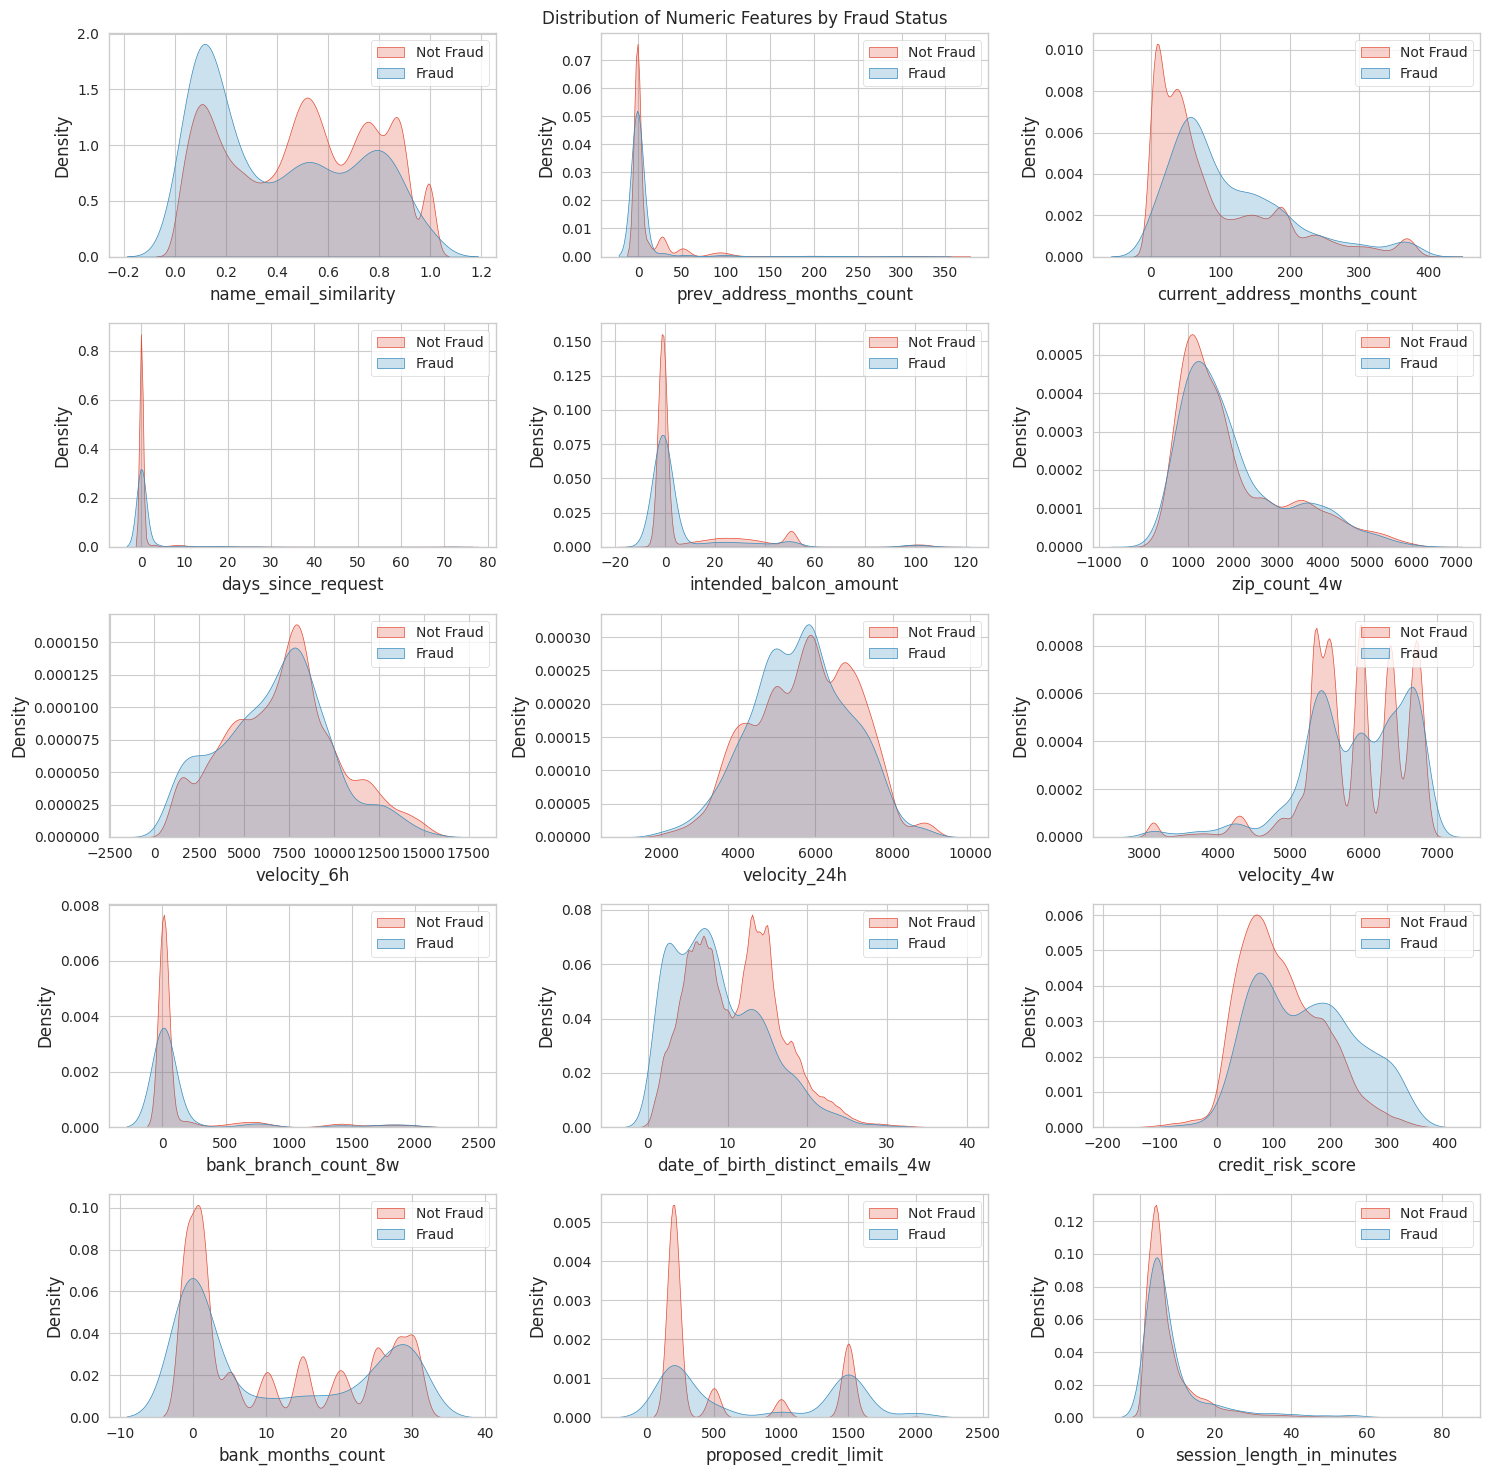

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

<ipython-input-18-a5f817a55da0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
<ipython-input-18-a5f817a55da0>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])
<ipython-input-18-a5f817a55da0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
<ipython-input-18-a5f817a55da0>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a

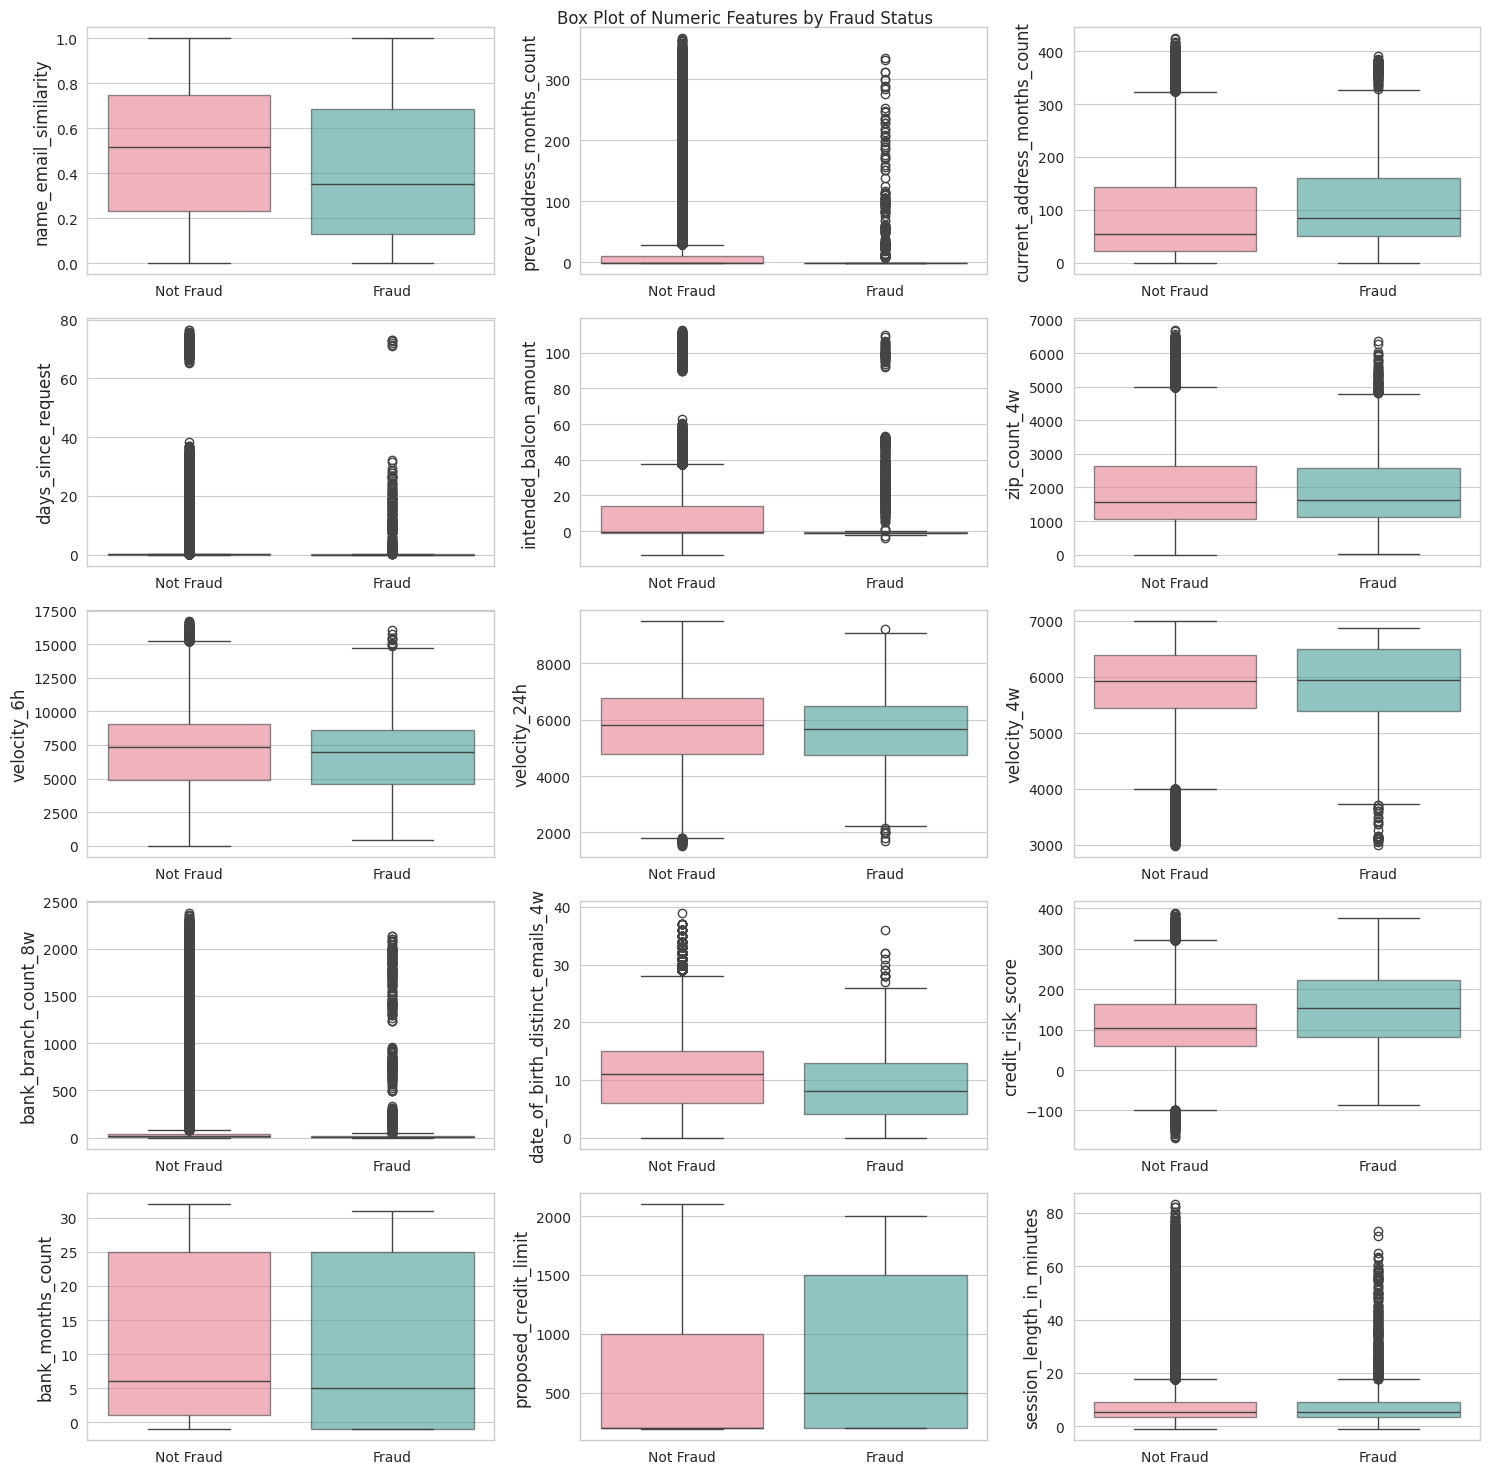

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)
print(df.shape[1])

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
32


In [ ]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))
print(new_df.shape[1])

53


In [ ]:
# Display the first 5 rows of the DataFrame
new_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1.0,25.0,40.0,0.006735,102.453711,1059.0,13096.035018,7850.955007,6742.080561,5.0,5.0,163.0,1.0,0.0,1.0,9.0,0.0,1500.0,0.0,16.224843,1.0,1.0,0.0,0.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
1,0,0.8,0.617426,-1.0,89.0,20.0,0.010095,-0.849551,1658.0,9223.283431,5745.251481,5941.664859,3.0,18.0,154.0,1.0,1.0,1.0,2.0,0.0,1500.0,0.0,3.363854,1.0,1.0,0.0,0.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,0,0.8,0.996707,9.0,14.0,40.0,0.012316,-1.490386,1095.0,4471.472149,5471.988958,5992.555113,15.0,11.0,89.0,1.0,0.0,1.0,30.0,0.0,200.0,0.0,22.730559,0.0,1.0,0.0,0.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0,0.6,0.475100,11.0,14.0,30.0,0.006991,-1.863101,3483.0,14431.993621,6755.344479,5970.336831,11.0,13.0,90.0,1.0,0.0,1.0,1.0,0.0,200.0,0.0,15.215816,1.0,1.0,0.0,0.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
4,0,0.9,0.842307,-1.0,29.0,40.0,5.742626,47.152498,2339.0,7601.511579,5124.046930,5940.734212,1.0,6.0,91.0,0.0,1.0,1.0,26.0,0.0,200.0,0.0,3.743048,0.0,1.0,0.0,0.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [ ]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

In [ ]:
# Import the necessary libraries for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')

# Fit the preprocessor on the training set and transform both the training and testing sets
X_scaled = preprocessor.fit_transform(X)
# X_test_scaled = preprocessor.transform(X_test)

In [ ]:
# Get the names of the features after pre-processing
feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
feature_names = [feature.replace('remainder__', '') for feature in feature_names]

# Print the pre-processed feature names
print(feature_names)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_B

In [ ]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

In [ ]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Import the necessary libraries for undersampling imbalanced datasets
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
pip install --upgrade numpy scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requir

In [ ]:
# Create a list of categorical features in the DataFrame X_scaled
categorical_features = [feature for feature in X_scaled.columns if X_scaled[feature].nunique() >= 2 and X_scaled[feature].nunique() < 10]

print(categorical_features)

['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [ ]:
# Create a list of numerical features in the DataFrame X_scaled
numeric_features = [feature for feature in X_scaled.columns if X_scaled[feature].nunique() >= 10]

print(numeric_features)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes']


In [ ]:
# Instantiate a VarianceThreshold selector and fit it to  training set
selector = VarianceThreshold()
selector.fit(X_scaled)

# Get the names of the constant features
constant_features = [feature for feature in X_scaled.columns
                     if feature not in X_scaled.columns[selector.get_support()]]

# Print the names of the constant features
print(constant_features)

['device_fraud_count']


In [ ]:
# Dropping constant features
X_scaled.drop(['device_fraud_count'], axis=1, inplace=True)

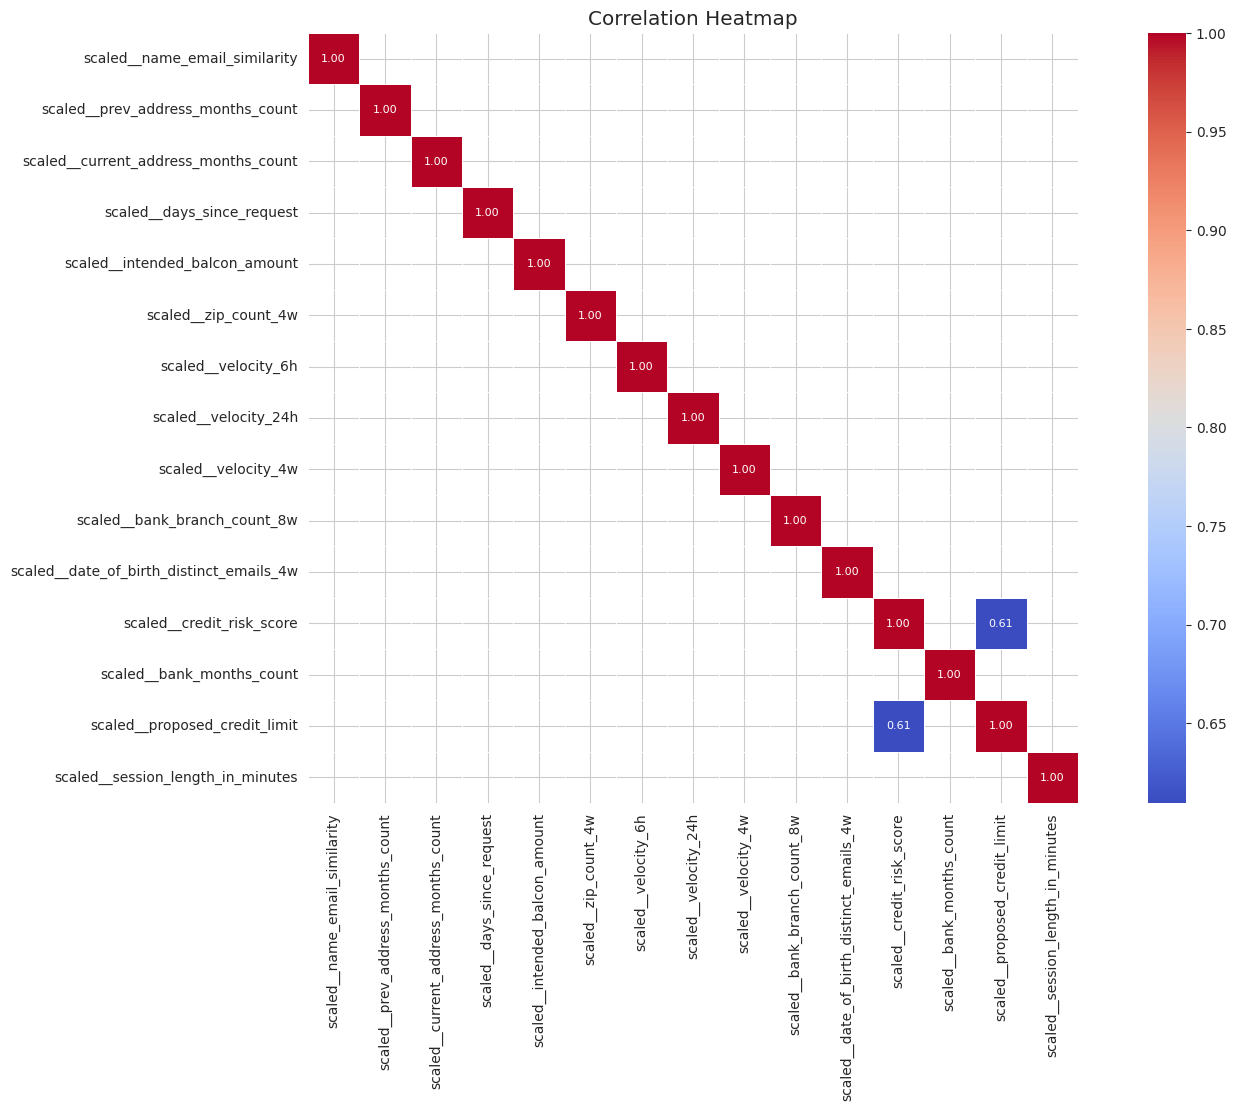

In [ ]:
# Compute correlation matrix
X_train_corr = X_scaled[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

### 3.3 Chi-Squared Test for Categorical Features

In [ ]:
# Check the distribution of values in a column
X_scaled.device_distinct_emails_8w.value_counts()

,count
device_distinct_emails_8w,
1.0,210617
2.0,8507
0.0,1877
-1.0,96


In [ ]:
# Identify the rows to drop based on a condition on a specific feature
rows_to_drop = np.where(X_scaled['device_distinct_emails_8w'] < 0)[0]
rows_to_drop

# Drop the corresponding rows in X_train and y_train
X_train_cat = X_scaled[categorical_features].copy()
X_train_cat.drop(rows_to_drop, axis=0, inplace=True)


y_train_cat = y.copy()
y_train_cat.drop(rows_to_drop, axis=0, inplace=True)

# Impute missing values in X_train_cat using the most frequent value
for col in X_train_cat.columns:
  most_frequent_value = X_train_cat[col].mode()[0]
  X_train_cat[col].fillna(most_frequent_value, inplace=True)

<ipython-input-40-9241f8710de3>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_cat[col].fillna(most_frequent_value, inplace=True)
<ipython-input-40-9241f8710de3>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_cat[col].fillna(most_frequent_value, inplace=True)


In [ ]:
# Use chi-squared test to evaluate the relationship between categorical features and the target variable
chi2_results = chi2(X_train_cat, y_train_cat)

In [ ]:
# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})

<ipython-input-43-9896c010044d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)
<ipython-input-43-9896c010044d>:5: UserWarning: 
The palette list has fewer values (2) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)


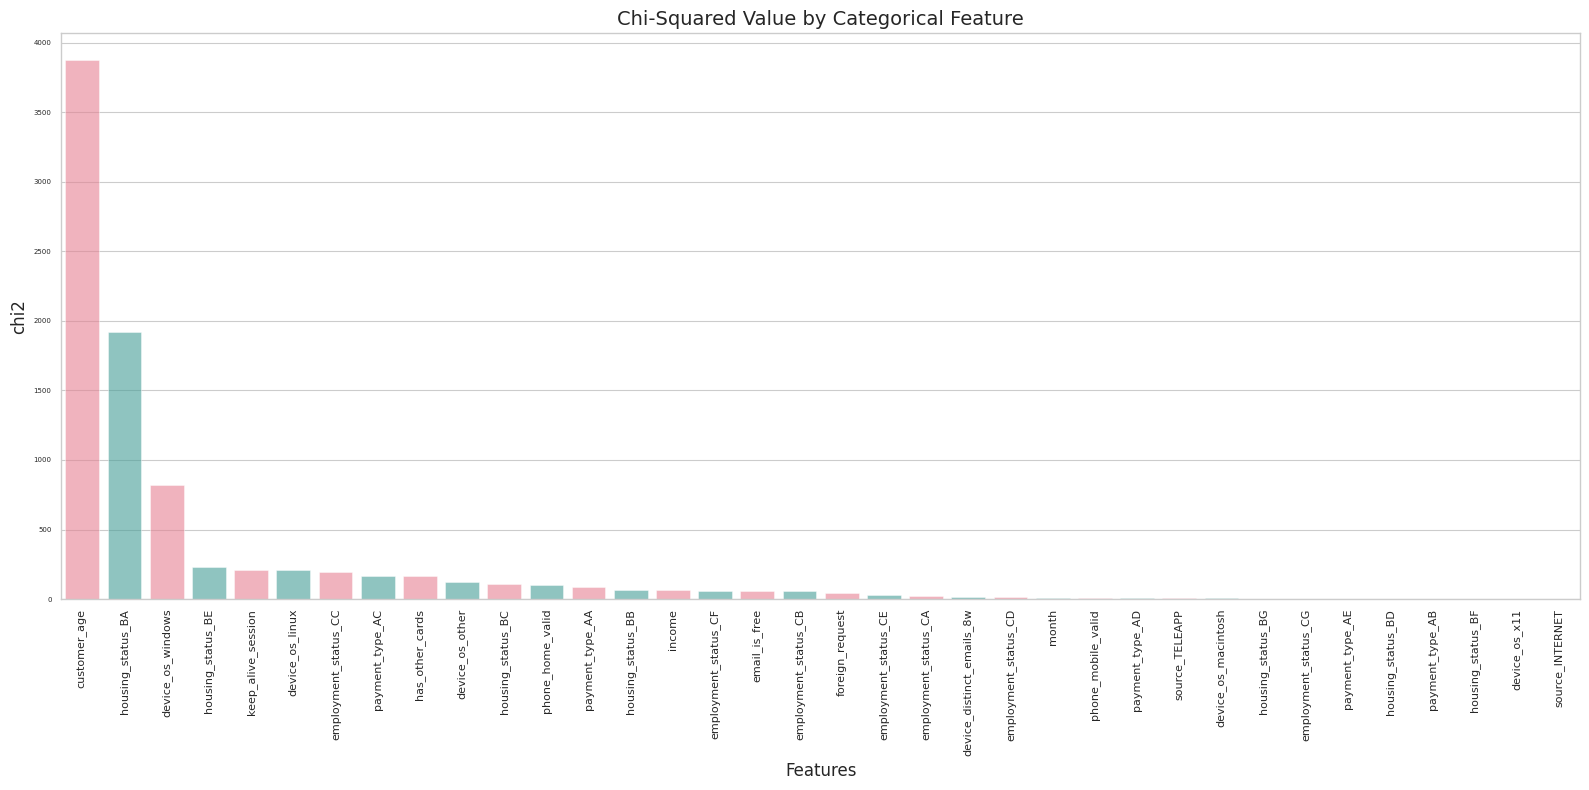

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Get the names of the top 5 features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

[Index(['income', 'customer_age', 'phone_home_valid', 'has_other_cards',
       'keep_alive_session', 'payment_type_AA', 'payment_type_AC',
       'employment_status_CC', 'housing_status_BA', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BE', 'device_os_linux',
       'device_os_other', 'device_os_windows'],
      dtype='object')]


### 3.4 Mutual Information Test for Numeric Features

In [ ]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y.copy()

In [ ]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y.copy()

# Import necessary libraries
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Initialize the PMM-like imputer
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=42, tol=0.001)

# Impute missing values in X_train_num using the imputer
X_train_num_imputed = pd.DataFrame(imputer.fit_transform(X_train_num), columns=X_train_num.columns)

# Use mutual information test to evaluate the relationship between numerical features and the target variable
mutual_info_results = mutual_info_classif(X_train_num_imputed, y_train_num)

In [ ]:
# Create a pandas DataFrame to store the mutual information test results
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

<ipython-input-55-48b4aa36023c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)
<ipython-input-55-48b4aa36023c>:2: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)


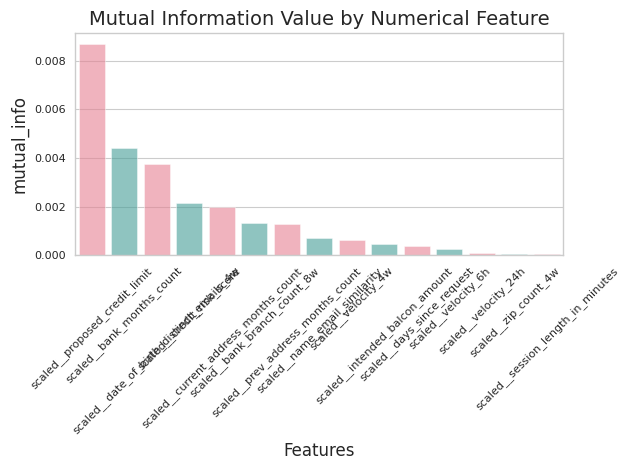

In [ ]:
# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Use SelectKBest with mutual information test to select the top 5 numerical features that are most strongly associated with the target variable
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(X_train_num_imputed, y_train_num)

# Get the names of the top 5 features
best_mutual_info_features = [X_train_num_imputed.columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

[Index(['scaled__name_email_similarity', 'scaled__prev_address_months_count',
       'scaled__current_address_months_count', 'scaled__days_since_request',
       'scaled__intended_balcon_amount', 'scaled__zip_count_4w',
       'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w',
       'scaled__bank_branch_count_8w',
       'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score',
       'scaled__bank_months_count', 'scaled__proposed_credit_limit',
       'scaled__session_length_in_minutes'],
      dtype='object')]


### 3.5 Extra Trees Classifier for Feature Selection

In [ ]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled, y)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(best_extra_features)

['scaled__name_email_similarity', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'device_distinct_emails_8w']


In [ ]:
extra_importances = pd.DataFrame({'feature': X_scaled.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})
extra_importances.head()

,feature,importance,model
0,scaled__name_email_similarity,0.053176,ExtraTreesClassifier
1,scaled__prev_address_months_count,0.012535,ExtraTreesClassifier
2,scaled__current_address_months_count,0.049919,ExtraTreesClassifier
3,scaled__days_since_request,0.052957,ExtraTreesClassifier
4,scaled__intended_balcon_amount,0.046772,ExtraTreesClassifier


<ipython-input-60-65c38ba5324b>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)


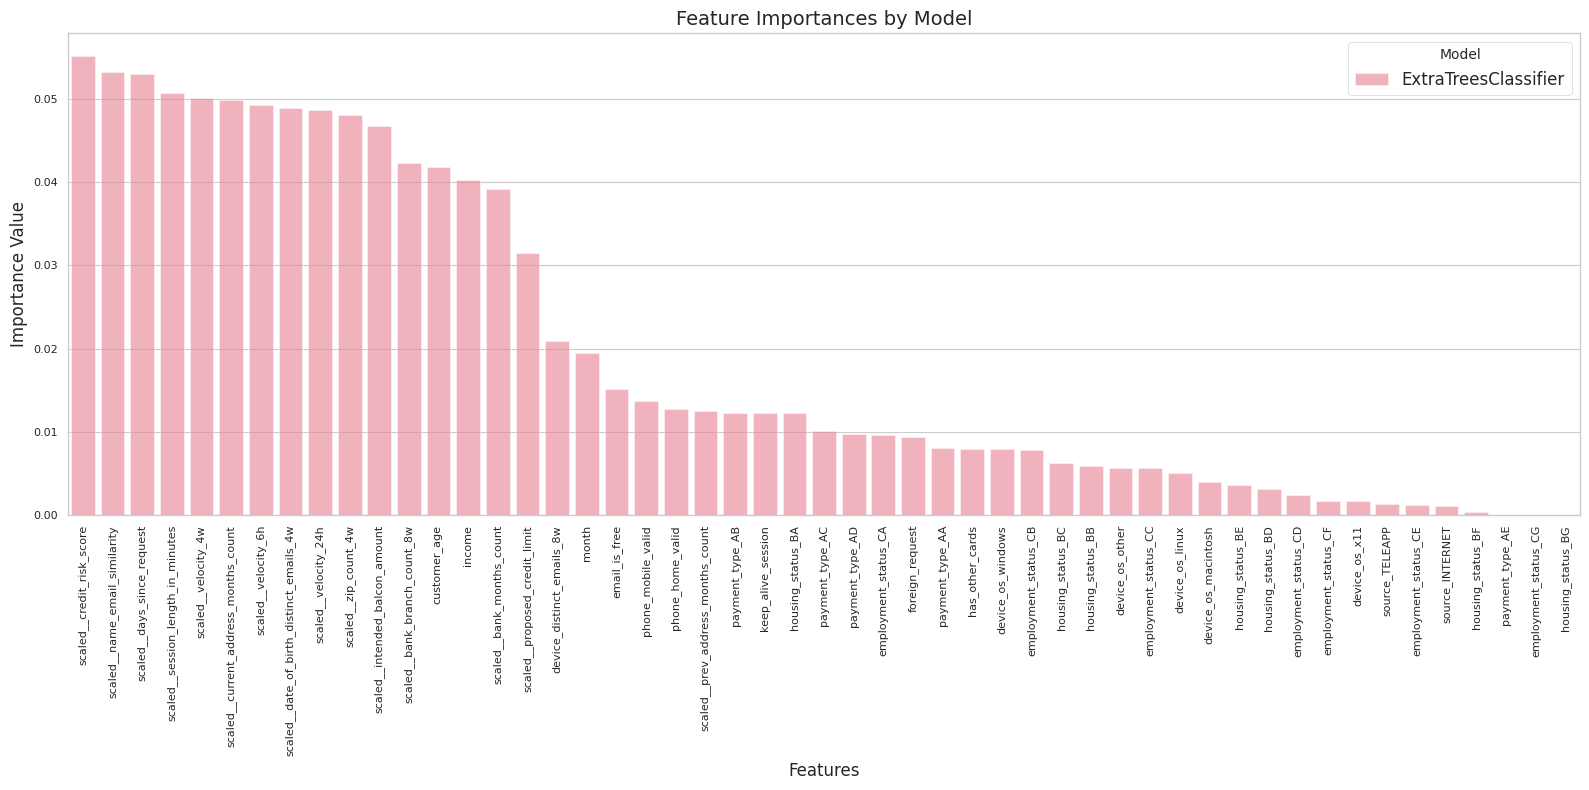

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Import the necessary libraries for oversampling imbalanced datasets
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline

In [ ]:
# Import necessary modules for hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.0 which is incompatible.


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(silent=True, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=0),
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the PMM-like imputer
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=20, random_state=42, tol=0.001)

# Define the function to evaluate models with sampling methods
def evaluate_models_with_sampling(X, y, sampling_method='SMOTE', sampling_strategy=0.7):
    # Define the sampling strategies
    sampling_methods = {
        'SMOTE': SMOTE(sampling_strategy=sampling_strategy, random_state=42),
        'SMOTETomek': SMOTETomek(sampling_strategy=sampling_strategy, random_state=42),
        'Undersample': RandomUnderSampler(random_state=42),
        'Oversample': RandomOverSampler(random_state=42),
        'ADASYN': ADASYN(sampling_strategy=sampling_strategy, random_state=42)
    }

    # Select the resampling method
    if sampling_method not in sampling_methods:
        raise ValueError(f"Sampling method '{sampling_method}' is not recognized.")

    sampler = sampling_methods[sampling_method]

    # Initialize results dictionary
    cv_results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []} for name in models.keys()}

    # Cross-validation loop
    for fold, (train_index, test_index) in enumerate(cv.split(X, y)):
        print(f"Processing fold {fold + 1}/{cv.n_splits}...")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PMM-like imputation
        X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

        # Resample the training data
        X_train_res, y_train_res = sampler.fit_resample(X_train_imputed, y_train)

        # Train and evaluate each model
        for name, model in models.items():
            model.fit(X_train_res, y_train_res)
            y_pred = model.predict(X_test_imputed)
            y_prob = model.predict_proba(X_test_imputed)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_pred))

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            auc = roc_auc_score(y_test, y_prob) if y_prob.any() else 0.0

            # Append results
            cv_results[name]['accuracy'].append(accuracy)
            cv_results[name]['precision'].append(precision)
            cv_results[name]['recall'].append(recall)
            cv_results[name]['f1'].append(f1)
            cv_results[name]['auc'].append(auc)



In [ ]:


# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(silent=True, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=0),
}

# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the PMM-like imputer
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=42, tol=0.001)

# Define a function to evaluate models with different sampling methods
def evaluate_models_with_sampling(X, y, sampling_method='SMOTE', sampling_strategy=0.7):
    # Define the sampling strategy dictionary
    sampling_methods = {
        'SMOTE': SMOTE(sampling_strategy=sampling_strategy, random_state=42),
        'SMOTETomek': SMOTETomek(sampling_strategy=sampling_strategy, random_state=42),
        'Undersample': RandomUnderSampler(random_state=42),
        'Oversample': RandomOverSampler(random_state=42),
        'ADASYN': ADASYN(sampling_strategy=sampling_strategy, random_state=42)
    }

    # Select the resampling method
    if sampling_method not in sampling_methods:
        raise ValueError(f"Sampling method '{sampling_method}' is not recognized.")

    sampler = sampling_methods[sampling_method]

    # Initialize dictionary to store the results for each model
    cv_results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []} for name in models.keys()}

    # Perform 5-fold CV with the chosen sampling method
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PMM-like imputation on both training and test sets
        X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

        # Apply the chosen sampling method to the training data
        X_train_res, y_train_res = sampler.fit_resample(X_train_imputed, y_train)

        # Train each model on the resampled training data and evaluate on the test fold
        for name, model in models.items():
            model.fit(X_train_res, y_train_res)
            y_pred = model.predict(X_test_imputed)
            y_prob = model.predict_proba(X_test_imputed)[:, 1]  # For AUC

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_prob)

            # Append the results to the dictionary
            cv_results[name]['accuracy'].append(accuracy)
            cv_results[name]['precision'].append(precision)
            cv_results[name]['recall'].append(recall)
            cv_results[name]['f1'].append(f1)
            cv_results[name]['auc'].append(auc)

    # Display the mean and standard deviation of the metrics for each model
    for name, metrics in cv_results.items():
        print(f"{name} 5-Fold CV Results with {sampling_method}:")
        print(f"Mean Accuracy: {np.mean(metrics['accuracy']):.4f} ± {np.std(metrics['accuracy']):.4f}")
        print(f"Mean Precision: {np.mean(metrics['precision']):.4f} ± {np.std(metrics['precision']):.4f}")
        print(f"Mean Recall: {np.mean(metrics['recall']):.4f} ± {np.std(metrics['recall']):.4f}")
        print(f"Mean F1 Score: {np.mean(metrics['f1']):.4f} ± {np.std(metrics['f1']):.4f}")
        print(f"Mean AUC: {np.mean(metrics['auc']):.4f} ± {np.std(metrics['auc']):.4f}")
        print("="*30)



In [76]:
# Evaluate models with different sampling techniques
evaluate_models_with_sampling(X_train, y_train, sampling_method='ADASYN', sampling_strategy=0.7)
evaluate_models_with_sampling(X_train, y_train, sampling_method='SMOTE', sampling_strategy=0.7)
evaluate_models_with_sampling(X_train, y_train, sampling_method='Undersample')
evaluate_models_with_sampling(X_train, y_train, sampling_method='Oversample')
evaluate_models_with_sampling(X_train, y_train, sampling_method='SMOTETomek', sampling_strategy=0.7)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7de3d1ba2b00>
Traceback

RandomForest 5-Fold CV Results with ADASYN:
Mean Accuracy: 0.9872 ± 0.0004
Mean Precision: 0.1904 ± 0.0238
Mean Recall: 0.0586 ± 0.0068
Mean F1 Score: 0.0893 ± 0.0089
Mean AUC: 0.8199 ± 0.0129
AdaBoost 5-Fold CV Results with ADASYN:
Mean Accuracy: 0.9226 ± 0.0073
Mean Precision: 0.0671 ± 0.0064
Mean Recall: 0.4802 ± 0.0348
Mean F1 Score: 0.1177 ± 0.0101
Mean AUC: 0.8334 ± 0.0150
GradientBoosting 5-Fold CV Results with ADASYN:
Mean Accuracy: 0.9753 ± 0.0003
Mean Precision: 0.1338 ± 0.0081
Mean Recall: 0.2384 ± 0.0162
Mean F1 Score: 0.1714 ± 0.0108
Mean AUC: 0.8421 ± 0.0121
XGBoost 5-Fold CV Results with ADASYN:
Mean Accuracy: 0.9715 ± 0.0012
Mean Precision: 0.1237 ± 0.0068
Mean Recall: 0.2734 ± 0.0255
Mean F1 Score: 0.1702 ± 0.0103
Mean AUC: 0.8456 ± 0.0120
CatBoost 5-Fold CV Results with ADASYN:
Mean Accuracy: 0.9891 ± 0.0001
Mean Precision: 0.4220 ± 0.0410
Mean Recall: 0.0434 ± 0.0045
Mean F1 Score: 0.0786 ± 0.0077
Mean AUC: 0.8519 ± 0.0093
LightGBM 5-Fold CV Results with ADASYN:
Mean

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio

RandomForest 5-Fold CV Results with SMOTE:
Mean Accuracy: 0.9870 ± 0.0004
Mean Precision: 0.1764 ± 0.0255
Mean Recall: 0.0569 ± 0.0084
Mean F1 Score: 0.0858 ± 0.0119
Mean AUC: 0.8202 ± 0.0139
AdaBoost 5-Fold CV Results with SMOTE:
Mean Accuracy: 0.9262 ± 0.0079
Mean Precision: 0.0684 ± 0.0063
Mean Recall: 0.4628 ± 0.0233
Mean F1 Score: 0.1191 ± 0.0096
Mean AUC: 0.8357 ± 0.0101
GradientBoosting 5-Fold CV Results with SMOTE:
Mean Accuracy: 0.9739 ± 0.0013
Mean Precision: 0.1279 ± 0.0091
Mean Recall: 0.2469 ± 0.0145
Mean F1 Score: 0.1684 ± 0.0103
Mean AUC: 0.8435 ± 0.0109
XGBoost 5-Fold CV Results with SMOTE:
Mean Accuracy: 0.9712 ± 0.0011
Mean Precision: 0.1229 ± 0.0066
Mean Recall: 0.2751 ± 0.0190
Mean F1 Score: 0.1698 ± 0.0091
Mean AUC: 0.8462 ± 0.0111
CatBoost 5-Fold CV Results with SMOTE:
Mean Accuracy: 0.9891 ± 0.0001
Mean Precision: 0.3862 ± 0.0698
Mean Recall: 0.0372 ± 0.0074
Mean F1 Score: 0.0678 ± 0.0132
Mean AUC: 0.8511 ± 0.0088
LightGBM 5-Fold CV Results with SMOTE:
Mean Accur

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base

RandomForest 5-Fold CV Results with Undersample:
Mean Accuracy: 0.7915 ± 0.0044
Mean Precision: 0.0374 ± 0.0007
Mean Recall: 0.7475 ± 0.0117
Mean F1 Score: 0.0712 ± 0.0013
Mean AUC: 0.8493 ± 0.0103
AdaBoost 5-Fold CV Results with Undersample:
Mean Accuracy: 0.7990 ± 0.0048
Mean Precision: 0.0397 ± 0.0003
Mean Recall: 0.7672 ± 0.0248
Mean F1 Score: 0.0755 ± 0.0007
Mean AUC: 0.8617 ± 0.0081
GradientBoosting 5-Fold CV Results with Undersample:
Mean Accuracy: 0.7932 ± 0.0030
Mean Precision: 0.0385 ± 0.0010
Mean Recall: 0.7655 ± 0.0233
Mean F1 Score: 0.0734 ± 0.0018
Mean AUC: 0.8593 ± 0.0095
XGBoost 5-Fold CV Results with Undersample:
Mean Accuracy: 0.7958 ± 0.0027
Mean Precision: 0.0391 ± 0.0007
Mean Recall: 0.7666 ± 0.0215
Mean F1 Score: 0.0744 ± 0.0013
Mean AUC: 0.8616 ± 0.0098
CatBoost 5-Fold CV Results with Undersample:
Mean Accuracy: 0.8021 ± 0.0034
Mean Precision: 0.0404 ± 0.0007
Mean Recall: 0.7689 ± 0.0210
Mean F1 Score: 0.0767 ± 0.0014
Mean AUC: 0.8670 ± 0.0092
LightGBM 5-Fold CV 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base

RandomForest 5-Fold CV Results with Oversample:
Mean Accuracy: 0.9893 ± 0.0001
Mean Precision: 0.3800 ± 0.3709
Mean Recall: 0.0034 ± 0.0028
Mean F1 Score: 0.0067 ± 0.0055
Mean AUC: 0.8076 ± 0.0164
AdaBoost 5-Fold CV Results with Oversample:
Mean Accuracy: 0.8030 ± 0.0021
Mean Precision: 0.0405 ± 0.0009
Mean Recall: 0.7672 ± 0.0174
Mean F1 Score: 0.0769 ± 0.0017
Mean AUC: 0.8627 ± 0.0073
GradientBoosting 5-Fold CV Results with Oversample:
Mean Accuracy: 0.8299 ± 0.0022
Mean Precision: 0.0452 ± 0.0014
Mean Recall: 0.7396 ± 0.0262
Mean F1 Score: 0.0851 ± 0.0026
Mean AUC: 0.8653 ± 0.0092
XGBoost 5-Fold CV Results with Oversample:
Mean Accuracy: 0.8288 ± 0.0027
Mean Precision: 0.0446 ± 0.0012
Mean Recall: 0.7345 ± 0.0253
Mean F1 Score: 0.0841 ± 0.0022
Mean AUC: 0.8652 ± 0.0096
CatBoost 5-Fold CV Results with Oversample:
Mean Accuracy: 0.9769 ± 0.0010
Mean Precision: 0.1426 ± 0.0110
Mean Recall: 0.2294 ± 0.0127
Mean F1 Score: 0.1757 ± 0.0113
Mean AUC: 0.8113 ± 0.0115
LightGBM 5-Fold CV Resul

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

RandomForest 5-Fold CV Results with SMOTETomek:
Mean Accuracy: 0.9870 ± 0.0004
Mean Precision: 0.1764 ± 0.0255
Mean Recall: 0.0569 ± 0.0084
Mean F1 Score: 0.0858 ± 0.0119
Mean AUC: 0.8202 ± 0.0139
AdaBoost 5-Fold CV Results with SMOTETomek:
Mean Accuracy: 0.9262 ± 0.0079
Mean Precision: 0.0684 ± 0.0063
Mean Recall: 0.4628 ± 0.0233
Mean F1 Score: 0.1191 ± 0.0096
Mean AUC: 0.8357 ± 0.0101
GradientBoosting 5-Fold CV Results with SMOTETomek:
Mean Accuracy: 0.9739 ± 0.0013
Mean Precision: 0.1279 ± 0.0091
Mean Recall: 0.2469 ± 0.0145
Mean F1 Score: 0.1684 ± 0.0103
Mean AUC: 0.8435 ± 0.0109
XGBoost 5-Fold CV Results with SMOTETomek:
Mean Accuracy: 0.9712 ± 0.0011
Mean Precision: 0.1229 ± 0.0066
Mean Recall: 0.2751 ± 0.0190
Mean F1 Score: 0.1698 ± 0.0091
Mean AUC: 0.8462 ± 0.0111
CatBoost 5-Fold CV Results with SMOTETomek:
Mean Accuracy: 0.9891 ± 0.0001
Mean Precision: 0.3862 ± 0.0698
Mean Recall: 0.0372 ± 0.0074
Mean F1 Score: 0.0678 ± 0.0132
Mean AUC: 0.8511 ± 0.0088
LightGBM 5-Fold CV Resul

In [77]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

### 5.1 Classification Report for Model Testing

In [78]:
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])

    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

### 5.2 Confusion Matrix for Model Testing

In [79]:
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Define the tick marks and the labels for the plot
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Add the count of each cell of the confusion matrix to the plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

### 5.3 Cross-Validation Results for Model Testing

In [80]:
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

### 5.4 ROC-AUC for Model Testing

In [81]:
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')

    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
